In [134]:
import nltk
from os import listdir
from os.path import isfile, join
import string
import kalevala_analysis as ka
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from scipy.sparse import find
import numpy as np

sn.set(style="whitegrid")

In [5]:
poems_list = ka.read_files('data')

In [6]:
cleaned_poems = list(ka.map_with_function(ka.remove_punctuations, poems_list))

In [7]:
poem_lists = ka.combine_and_tokenize_all_poems(cleaned_poems)

In [8]:
metrics=ka.calculate_metrics(poems_list)

In [9]:
metrics_as_arrays=[[name, lines, words] for name, lines, words in metrics]

In [10]:
df=pd.DataFrame(metrics_as_arrays, columns=['poem_name', 'row_count', 'word_count'])

In [11]:
df.head()

,poem_name,row_count,word_count
0,29.txt,301,1819
1,15.txt,327,1919
2,14.txt,231,1342
3,28.txt,147,873
4,16.txt,206,1224


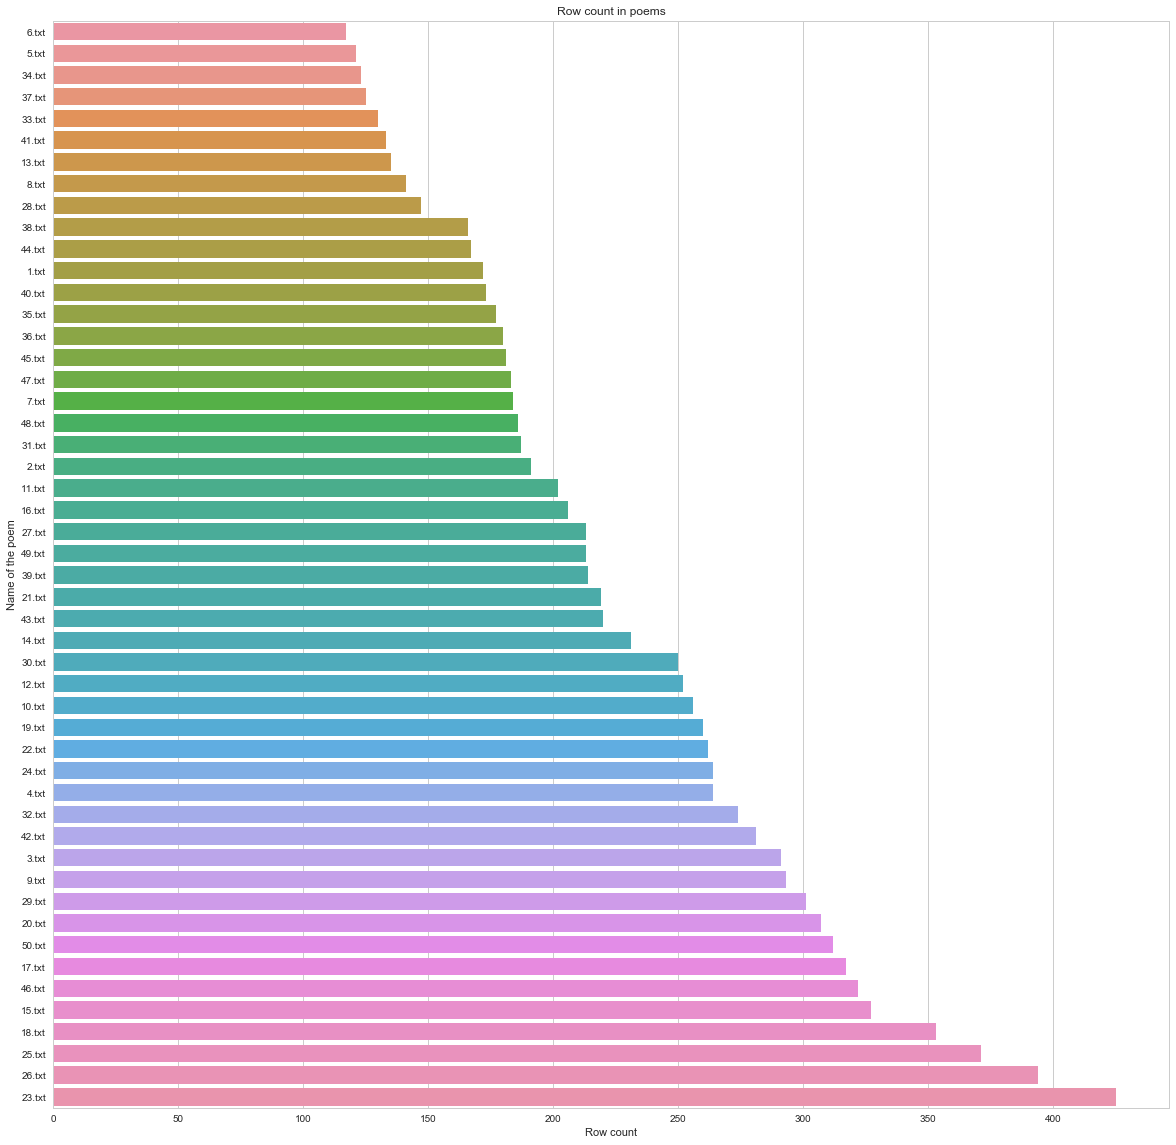

In [12]:
plt.figure(figsize=(20,20))
plotfig=sn.barplot(y='poem_name', x='row_count', data=df.sort_values(by='row_count'))
plt.xlabel('Row count')
plt.ylabel('Name of the poem')
plt.title("Row count in poems")
plt.show(plotfig)


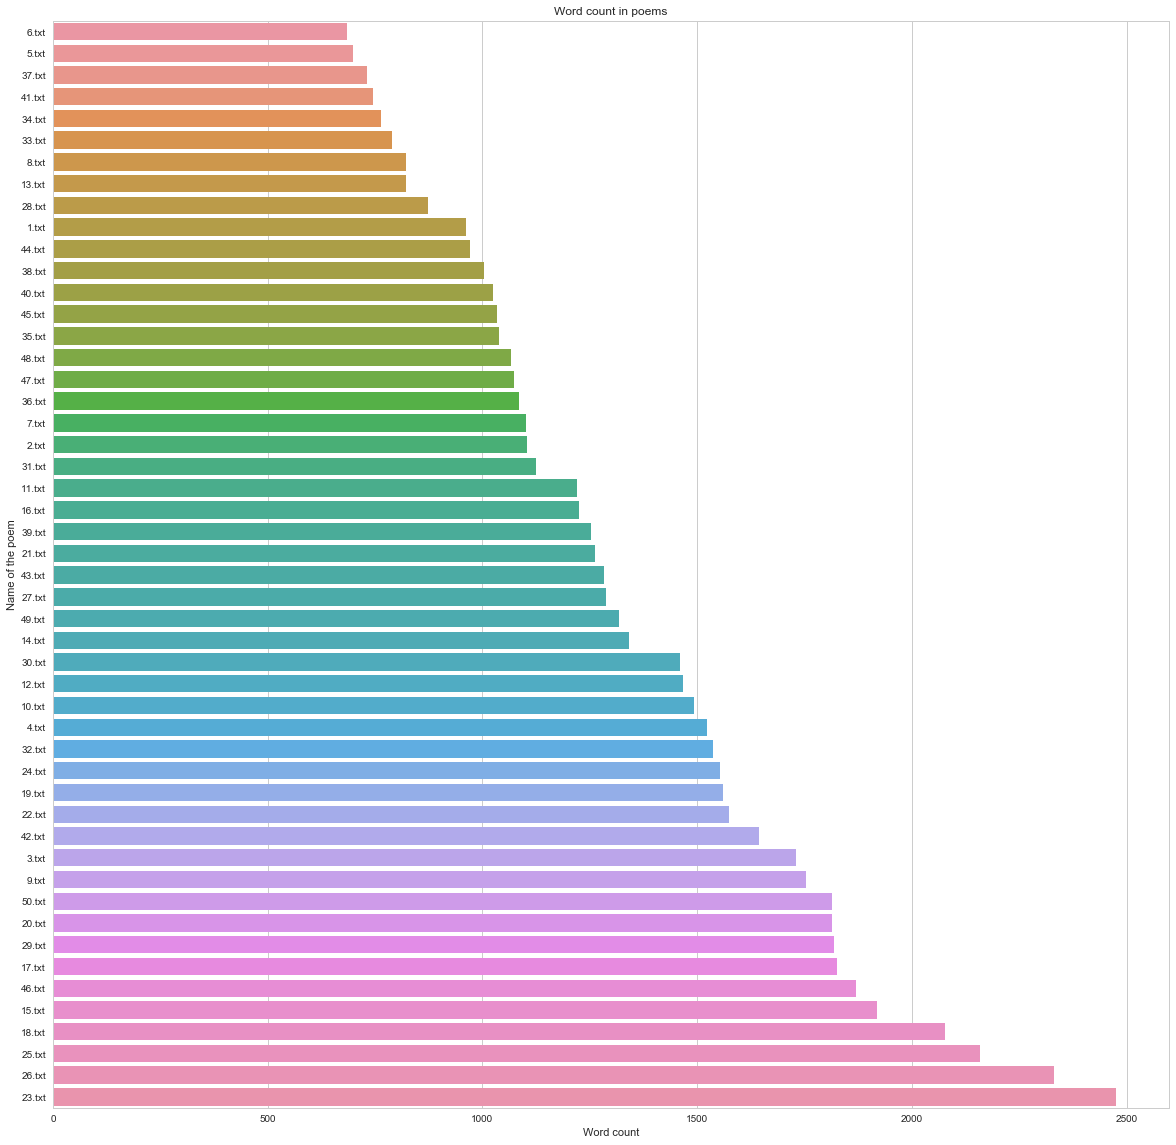

In [13]:
plt.figure(figsize=(20,20))
plotfig=sn.barplot(y='poem_name', x='word_count', data=df.sort_values(by='word_count'))
plt.xlabel('Word count')
plt.ylabel('Name of the poem')
plt.title("Word count in poems")
plt.show(plotfig)

In [135]:
corpus=map(lambda x: ' '.join(x[1]), cleaned_poems)

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
voc=np.array(vectorizer.get_feature_names())

In [186]:
def find_n_keywords_in_doc(info, voc, n=10):
    dat=find(info)
    df=pd.DataFrame(data={'doc': dat[0], 'word':voc[dat[1]], 'tfidf': dat[2]})
    return df.sort_values(by=['doc', 'tfidf']).head(n)
    

In [187]:
find_n_keywords_in_doc(tfidf, voc, 50)

,doc,word,tfidf
2361,0,en,0.005601
30824,0,se,0.005945
30545,0,sanovi,0.006064
5082,0,ilman,0.006313
22902,0,ole,0.006443
36061,0,toinen,0.006443
37143,0,tuo,0.006443
26514,0,poika,0.006576
36695,0,tulevi,0.006576
20280,0,minä,0.006712


AttributeError: get_feature_names not found